In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
import numpy as np

data_x = np.load('x_train.npy')

In [ ]:
#questa è la time series, 2429 oggetti misurati 36 volte ciascuno su 6 attributi
print(data_x.shape)

In [ ]:
import numpy as np

data_y = np.load('y_train.npy')
data_y

In [ ]:
#questa è l'associazione di ogni time serie alla classe
print(data_y.shape)

In [7]:
data_t = np.zeros((2429,36,6))
for i in range(2429):
    for j in range(36):
        for k in range(3):
            data_t[i][j][k] = data_x[i][j][k]*0.5
        for k in range(3,6):
            data_t[i][j][k] = data_x[i][j][k]*2

In [7]:
##NON ESEGUITO
data_t = np.zeros((2429, 108, 2))
a = 0
b=0
for i in range(2429):
    for j in range(36):
        for k in range(6):
            data_t[i][a][b] = data_x [i][j][k]
            #print(i,j,k,a,b)
            if(k%2==1 and a<107):
                a = a+1
                b=0
            elif(a<107):
                b=1
            else:
                a=0
data_t

array([[[ 9.8883e+02,  8.1713e+00],
        [-1.7842e+00, -1.9706e+01],
        [-9.7135e+00, -6.1887e+01],
        ...,
        [ 4.3719e+01,  3.0689e+01],
        [ 9.5092e+02,  8.5927e+02],
        [ 8.1331e+03,  0.0000e+00]],

       [[-1.9564e-01,  0.0000e+00],
        [ 1.1487e+00,  2.3275e+01],
        [ 2.3654e+01, -3.8171e+00],
        ...,
        [-5.5260e+00,  1.9070e+01],
        [-4.6352e+00, -3.2769e+00],
        [-5.9048e+00,  0.0000e+00]],

       [[ 2.2734e+00,  0.0000e+00],
        [ 4.4831e+00, -1.2885e+01],
        [ 1.0488e+01, -6.6960e+01],
        ...,
        [ 6.0153e+00, -6.8815e+00],
        [ 1.0936e+01, -6.4854e+01],
        [ 1.2557e+01,  0.0000e+00]],

       ...,

       [[ 7.7363e+02,  0.0000e+00],
        [ 1.2328e-01,  8.2416e+01],
        [ 2.5118e+02,  4.6314e+02],
        ...,
        [-1.9275e+00,  1.0337e+02],
        [ 2.9050e+02,  5.0103e+02],
        [ 6.6608e+02,  0.0000e+00]],

       [[-7.0557e-01,  0.0000e+00],
        [ 5.2729e+00,  1.64

In [11]:
#NORMALIZZAZIONE A MEDIA E VARIANZA NON ESEGUITA

import torch
  
# Step 2: creating a torch tensor
t = torch.tensor(data_t)
print("Tensor before Normalize:\n", t)
  
# Step 3: Computing the mean, std and variance
mean, std, var = torch.mean(t), torch.std(t), torch.var(t)
print("Mean, Std and Var before Normalize:\n", 
      mean, std, var)
  
# Step 4: Normalizing the tensor
t  = (t-mean)/std
print("Tensor after Normalize:\n", t)
  
# Step 5: Again compute the mean, std and variance
# after Normalize
mean, std, var = torch.mean(t), torch.std(t), torch.var(t)
print("Mean, std and Var after normalize:\n", 
      mean, std, var)

Tensor before Normalize:
 tensor([[[ 9.8883e+02,  8.1713e+00],
         [-1.7842e+00, -1.9706e+01],
         [-9.7135e+00, -6.1887e+01],
         ...,
         [ 4.3719e+01,  3.0689e+01],
         [ 9.5092e+02,  8.5927e+02],
         [ 8.1331e+03,  0.0000e+00]],

        [[-1.9564e-01,  0.0000e+00],
         [ 1.1487e+00,  2.3275e+01],
         [ 2.3654e+01, -3.8171e+00],
         ...,
         [-5.5260e+00,  1.9070e+01],
         [-4.6352e+00, -3.2769e+00],
         [-5.9048e+00,  0.0000e+00]],

        [[ 2.2734e+00,  0.0000e+00],
         [ 4.4831e+00, -1.2885e+01],
         [ 1.0488e+01, -6.6960e+01],
         ...,
         [ 6.0153e+00, -6.8815e+00],
         [ 1.0936e+01, -6.4854e+01],
         [ 1.2557e+01,  0.0000e+00]],

        ...,

        [[ 7.7363e+02,  0.0000e+00],
         [ 1.2328e-01,  8.2416e+01],
         [ 2.5118e+02,  4.6314e+02],
         ...,
         [-1.9275e+00,  1.0337e+02],
         [ 2.9050e+02,  5.0103e+02],
         [ 6.6608e+02,  0.0000e+00]],

        

In [12]:
t = np.array(t)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1, random_state=42)

In [ ]:
Y_train = tfk.utils.to_categorical(y_train)
Y_test = tfk.utils.to_categorical(y_test)

input_shape = X_train.shape[1:]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [ ]:
input_shape = X_train.shape[1:]
classes = Y_train.shape[-1]
batch_size = 64
epochs = 200

In [ ]:
def build_model(input_shape, classes, pre_model=None):
    
    ip = tfkl.Input(shape=(input_shape))

    bilstm = tfkl.Bidirectional(tfkl.LSTM(256, return_sequences=True))(ip)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(256))(bilstm)
    x = tfkl.Dropout(0.8)(bilstm)
    x = tfkl.Activation('relu')(x)

    #y = tfkl.Permute((2, 1))(ip)
    y = tfk.layers.Conv1D(filters=256, kernel_size=8, padding='same')(ip)
    y = tfk.layers.BatchNormalization()(y)
    y = tfk.layers.Activation(activation='relu')(y)
    
    y = tfk.layers.Conv1D(filters=512, kernel_size=5, padding='same')(y)
    y = tfk.layers.BatchNormalization()(y)
    y = tfk.layers.Activation('relu')(y)

    y = tfk.layers.Conv1D(512, kernel_size=5,padding='same')(y)
    y = tfk.layers.BatchNormalization()(y)
    y = tfk.layers.Activation('relu')(y)
    
    y = tfk.layers.Conv1D(filters=128, kernel_size=8, padding='same')(y)
    y = tfk.layers.BatchNormalization()(y)
    y = tfk.layers.Activation('relu')(y)
    y = tfkl.GlobalAveragePooling1D()(y)
    

    x = tfkl.concatenate([x, y])

    out = tfkl.Dense(classes, activation='softmax')(x)

    model = tfk.Model(ip, out)
    if pre_model is not None:
        for i in range(len(model.layers)-1):
            model.layers[i].set_weights(pre_model.layers[i].get_weights())

    model.compile(loss='categorical_crossentropy', optimizer = tfk.optimizers.Adam(),
        metrics=['accuracy'])

    #model.summary()

    # add load model code here to fine-tune

    return model
    

In [ ]:
import keras_tuner
# Encoder Summary Example
model = build_model((36,6), classes)
model.summary()

In [ ]:
# Train the model
history = model.fit(
    x = X_train,
    y = Y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.15,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=30, factor=0.5, min_lr=1e-5)
    ]
).history

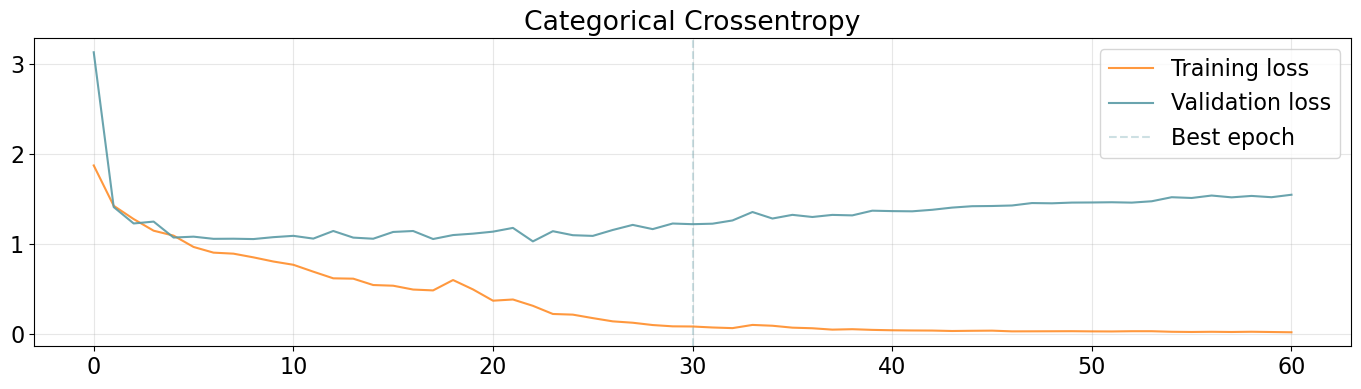

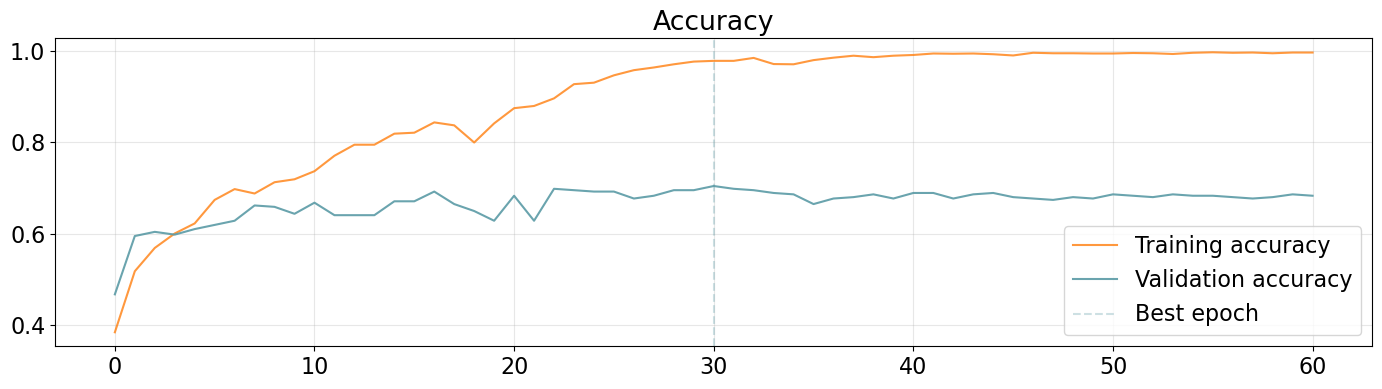

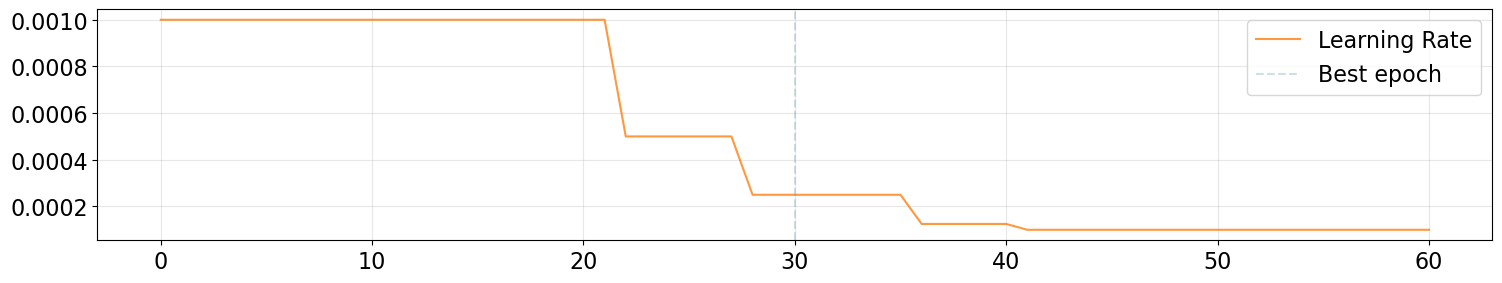

In [14]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [15]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
2/2 [==============================] - 0s 168ms/step - loss: 1.0557 - accuracy: 0.7366
test loss, test acc: [1.055664300918579, 0.7366254925727844]
Generate predictions for 3 samples
8/8 [==============================] - 2s 80ms/step
predictions shape: (243, 12)


In [32]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model_tuned.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model_tuned.predict(X_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
4/4 [==============================] - 0s 93ms/step - loss: 2.1295 - accuracy: 0.6523
test loss, test acc: [2.1294970512390137, 0.6522634029388428]
Generate predictions for 3 samples
16/16 [==============================] - 1s 31ms/step
predictions shape: (486, 12)


In [16]:
model.save('Handmade_NewModel_Hyb_3_Tuned')

INFO:tensorflow:Assets written to: Handmade_NewModel_Hyb_3_Tuned\assets


INFO:tensorflow:Assets written to: Handmade_NewModel_Hyb_3_Tuned\assets
